In [1]:
library(dplyr)
library(ggplot2)
library(magrittr)
library(Matrix)
library(rtracklayer)
library(scales)
library(stringr)
library(targets)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading

In [2]:
lift <- import.chain("illustrations/dm3ToDm6.over.chain")
lift_dm3_to_flybase_dm6 <- \(gr)
  gr %>%
    liftOver(lift) %>%
    unlist() %>%
    attributes() %$%
    GRanges(
      as.factor(seqnames) %>%
        recode(
          chr2L="2L",
          chr2R="2R",
          chr3L="3L",
          chr3R="3R",
          chr4="4",
          chrX="X",
          chrY="Y",
          chrM="mitochondrion_genome"
        ),
      ranges,
      score = elementMetadata$score
    )
time_dm6 <- \(track, repli) {
  hits <- findOverlaps(
    GRanges(seqnames(track), IRanges(mid(ranges(track)), width=1)),
    repli
  )
  track$timing <- repli$score[
    sapply(hits, \(v) v[1])
  ]
  track
}

In [3]:
tar_load(
  c(
    chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr,
    chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr,
    chic.tile.diameter_500_chr,
    repli.timing_Germline_chr,
    repli.timing_Somatic_chr,
    repli.timing_Kc167_chr,
    repli.timing_S2_chr,
  )
)

In [4]:
Mark_Name <- "H3K27"
if (Mark_Name == "H3K27") {
  Kc167_bedgraph <- "illustrations/GSE45083_H3K27.bedgraph.gz"
  S2_bedgraph <- "illustrations/GSE20781_repset.4621697.smoothedM.bedgraph.gz"
} else if (Mark_Name == "H3K4") {
  Kc167_bedgraph <- "illustrations/GSE45088_repset.17402831.smoothedM.bedgraph.gz"
  S2_bedgraph <- "illustrations/GSE20787_repset.3211336.smoothedM.bedgraph.gz"
  chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr <- tar_read(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr)
  chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr <- tar_read(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr)
} else if (Mark_Name == "H3K9") {
  Kc167_bedgraph <- "illustrations/GSE27796_H3K9.bedgraph.gz"
  S2_bedgraph <- "illustrations/GSE20794_repset.3506194.smoothedM.bedgraph.gz"
  chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr <- tar_read(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr)
  chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr <- tar_read(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr)
}

Load ChIP-chip data with the lifted windows from dm3 to dm6:

In [5]:
H3K27_Kc167 <- read.table(Kc167_bedgraph, sep=" ", skip=1) %$%
  GRanges(V1, IRanges(V2 + 1, V3), score = V4) %>%
  lift_dm3_to_flybase_dm6()
print(H3K27_Kc167)

GRanges object with 2830759 ranges and 1 metadata column:
            seqnames            ranges strand |     score
               <Rle>         <IRanges>  <Rle> | <numeric>
        [1]       3R   4174281-4174315      * | 0.0219342
        [2]       3R   4174320-4174354      * | 0.0229014
        [3]       3R   4174360-4174394      * | 0.0256641
        [4]       3R   4174399-4174433      * | 0.0303834
        [5]       3R   4174437-4174471      * | 0.0346508
        ...      ...               ...    ... .       ...
  [2830755]       2L 23511647-23511681      * | -0.632906
  [2830756]       2L 23512678-23512712      * | -0.741759
  [2830757]       2L 23512717-23512751      * | -0.745904
  [2830758]       2L 23512759-23512793      * | -0.750369
  [2830759]       2L 23512953-23512987      * | -0.771009
  -------
  seqinfo: 8 sequences from an unspecified genome; no seqlengths


In [6]:
H3K27_S2 <- read.table(S2_bedgraph, sep=" ", skip=1) %$%
  GRanges(V1, IRanges(V2 + 1, V3), score = V4) %>%
  lift_dm3_to_flybase_dm6()
print(H3K27_S2)

GRanges object with 2831264 ranges and 1 metadata column:
            seqnames            ranges strand |      score
               <Rle>         <IRanges>  <Rle> |  <numeric>
        [1]       3R   4174281-4174315      * | -0.0888116
        [2]       3R   4174320-4174354      * | -0.0924584
        [3]       3R   4174360-4174394      * | -0.0973156
        [4]       3R   4174399-4174433      * | -0.1036933
        [5]       3R   4174437-4174471      * | -0.1129183
        ...      ...               ...    ... .        ...
  [2831260]       2L 23511647-23511681      * |  -0.704845
  [2831261]       2L 23512678-23512712      * |  -0.817770
  [2831262]       2L 23512717-23512751      * |  -0.822342
  [2831263]       2L 23512759-23512793      * |  -0.827294
  [2831264]       2L 23512953-23512987      * |  -0.850584
  -------
  seqinfo: 8 sequences from an unspecified genome; no seqlengths


Create new ChIP-chip tracks resampled on 500 bp sliding window and using averaging:

In [7]:
H3K27_Kc167 <- GRanges(
  chic.tile.diameter_500_chr,
  score = {
    ov <- findOverlaps(
      chic.tile.diameter_500_chr,
      H3K27_Kc167
    )
    score <- H3K27_Kc167$score[to(ov)]
    tibble(
      i = from(ov),
      score
    ) %>%
      group_by(i) %>%
      summarise(
        score = if (length(score) > 1) {
          mean(score)
        } else {
          0
        }
      ) %$%
      sparseVector(
        i = i,
        x = score,
        length = length(chic.tile.diameter_500_chr)
      ) %>%
      as.numeric()
  }
)
print(H3K27_Kc167)

GRanges object with 1378116 ranges and 1 metadata column:
                   seqnames    ranges strand |     score
                      <Rle> <IRanges>  <Rle> | <numeric>
        [1]              2L     1-300      * |  0.815863
        [2]              2L     1-400      * |  0.815863
        [3]              2L     1-500      * |  0.819911
        [4]              2L   101-600      * |  0.819911
        [5]              2L   201-700      * |  0.826957
        ...             ...       ...    ... .       ...
  [1378112] 211000022279929    1-2207      * |         0
  [1378113] 211000022279931    1-1724      * |         0
  [1378114] 211000022279933    1-1108      * |         0
  [1378115] 211000022279934    1-1643      * |         0
  [1378116] 211000022279940    1-4361      * |         0
  -------
  seqinfo: 1870 sequences from an unspecified genome


In [8]:
H3K27_S2 <- GRanges(
  chic.tile.diameter_500_chr,
  score = {
    ov <- findOverlaps(
      chic.tile.diameter_500_chr,
      H3K27_S2
    )
    score <- H3K27_S2$score[to(ov)]
    tibble(
      i = from(ov),
      score
    ) %>%
      group_by(i) %>%
      summarise(
        score = if (length(score) > 1) {
          mean(score)
        } else {
          0
        }
      ) %$%
      sparseVector(
        i = i,
        x = score,
        length = length(chic.tile.diameter_500_chr)
      ) %>%
      as.numeric()
  }
)
print(H3K27_S2)

GRanges object with 1378116 ranges and 1 metadata column:
                   seqnames    ranges strand |     score
                      <Rle> <IRanges>  <Rle> | <numeric>
        [1]              2L     1-300      * |   1.90113
        [2]              2L     1-400      * |   1.90113
        [3]              2L     1-500      * |   1.89736
        [4]              2L   101-600      * |   1.89736
        [5]              2L   201-700      * |   1.86082
        ...             ...       ...    ... .       ...
  [1378112] 211000022279929    1-2207      * |         0
  [1378113] 211000022279931    1-1724      * |         0
  [1378114] 211000022279933    1-1108      * |         0
  [1378115] 211000022279934    1-1643      * |         0
  [1378116] 211000022279940    1-4361      * |         0
  -------
  seqinfo: 1870 sequences from an unspecified genome


Test the ChIC-ChIP sequencing-based technology Negative Binomial regression vs the ChIP-chip Z-score, which should be closer to the unit normal distribution. Both of them had a median near zero. However, they both have empirically slightly different distribution from the unit normal.

In [9]:
qnorm(c(0.25, 0.5, 0.75))

[1] -0.6744898  0.0000000  0.6744898

In [10]:
summary(subset(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr, seqnames %in% c("2L", "2R", "3L", "3R", "4"))$L2FC)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-10.00000  -0.29244   0.00902  -0.07333   0.32904  10.00000 

In [11]:
summary(subset(H3K27_Kc167, seqnames %in% c("2L", "2R", "3L", "3R", "4"))$score)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.39482 -0.37250  0.00000 -0.01425  0.23774  3.48951 

In [12]:
tibble(
  seqnames = as.factor(seqnames(chic.tile.diameter_500_chr)),
  GSC = chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr$L2FC,
  CySC = chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr$L2FC,
  Kc167 = H3K27_Kc167$score,
  S2 = H3K27_S2$score,
) %>%
  subset(seqnames %in% c("2L", "2R", "3L", "3R", "4"), select=-seqnames) %>%
  summarise_all(list(mean=mean, median=median, sd=sd)) %>%
  unlist() %>%
  enframe()

name,value
<chr>,<dbl>
GSC_mean,-7.333072e-02
CySC_mean,-3.510790e-02
Kc167_mean,-1.424612e-02
S2_mean,-5.253860e-03
GSC_median,9.019584e-03
CySC_median,1.712577e-10
Kc167_median,0.000000e+00
S2_median,0.000000e+00
GSC_sd,1.055168e+00


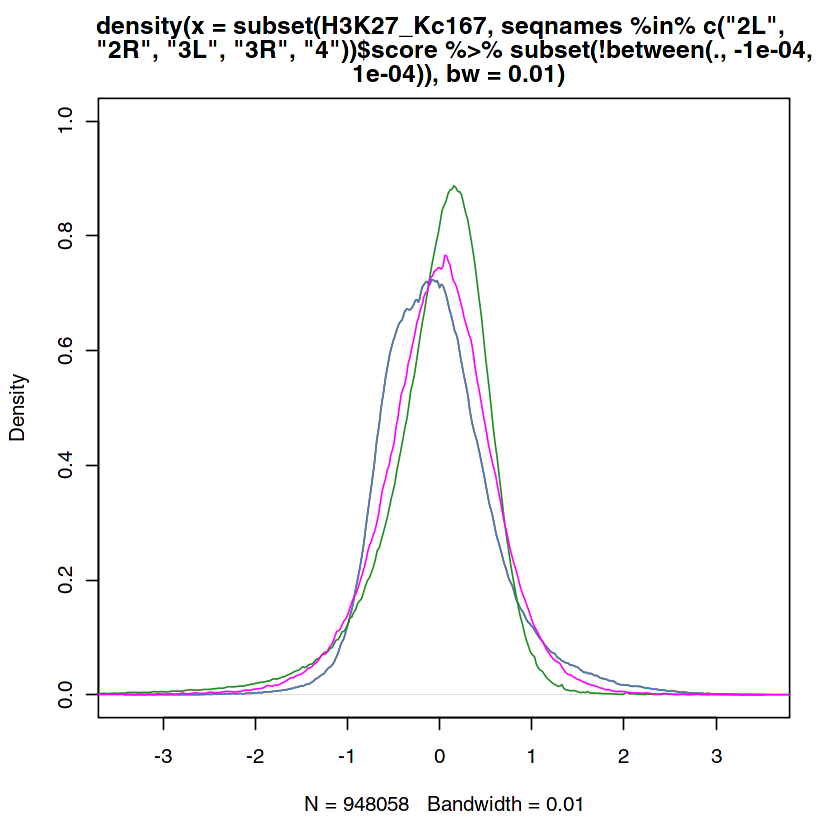

In [13]:
plot(density(subset(H3K27_Kc167, seqnames %in% c("2L", "2R", "3L", "3R", "4"))$score %>% subset(!between(., -1e-4, 1e-4)), bw=0.01), ylim=c(0, 1), col='brown')
lines(density(subset(H3K27_Kc167, seqnames %in% c("2L", "2R", "3L", "3R", "4"))$score %>% subset(!between(., -1e-4, 1e-4)), bw=0.01), col='steelblue')
lines(density(subset(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr, seqnames %in% c("2L", "2R", "3L", "3R", "4"))$L2FC %>% subset(between(., -7.5, 7.5) & !between(., -1e-4, 1e-4)), bw=0.01), col='forestgreen')
lines(density(subset(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr, seqnames %in% c("2L", "2R", "3L", "3R", "4"))$L2FC %>% subset(between(., -7.5, 7.5) & !between(., -1e-4, 1e-4)), bw=0.01), col='magenta')

ChIC-ChIP Negative Binomial L2FC is closer to the unit normal distribution than the ChIP-chip z-score is to the unit normal:

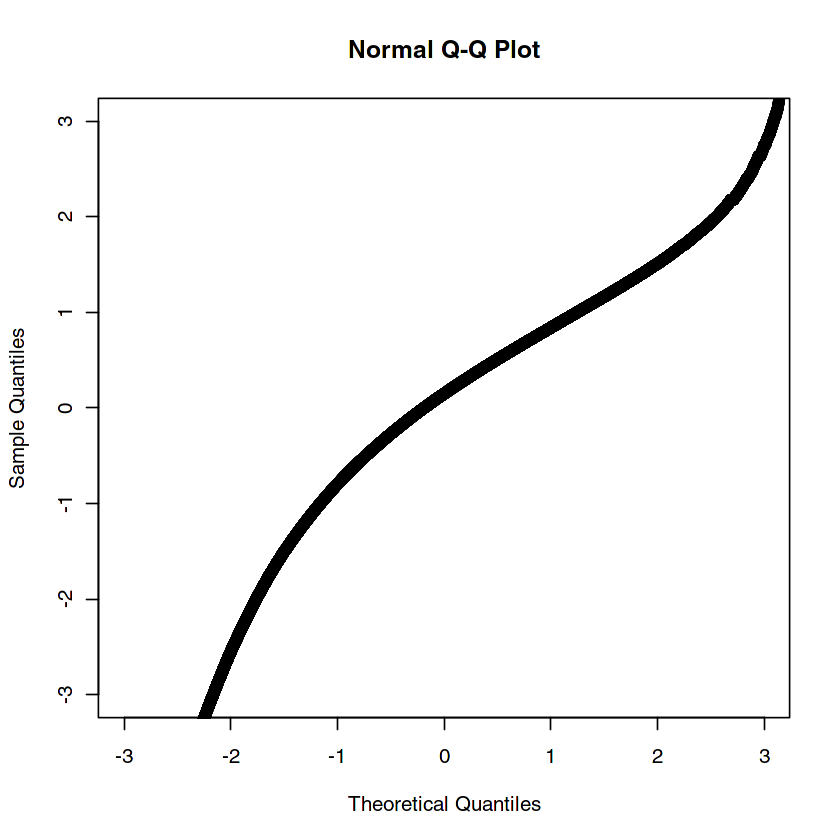

In [14]:
subset(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr, seqnames %in% c("2L", "2R", "3L", "3R", "4"))$L2FC %>%
  subset(between(., -7.5, 7.5) & !between(., -1e-4, 1e-4)) %>%
  scale() %>%
  qqnorm(xlim=c(-3,3), ylim=c(-3,3))

Produce a new estimator range using the unit normal, and using the ranks of the steps on the autosomes.

The estimator will have a zero mean and median on the autosomes, but will also be unit-normal distributed (with zero inflated) on the autosomes. All other scores on the other reference sequences are fitted to the unit normal using linear interpolation. The inflated zeroes (sparse coverage) are handled by finding the mode of the table of the data, and resetting values within 1/10^6 of the mode (the old insufficient coverage / zero values) to the new inflated zero.

In [15]:
rnk <- approx(
  subset(H3K27_Kc167, seqnames %in% c("2L", "2R", "3L", "3R", "4") & !between(score, -1e-4, 1e-4))$score,
  rank(subset(H3K27_Kc167, seqnames %in% c("2L", "2R", "3L", "3R", "4") & !between(score, -1e-4, 1e-4))$score, ties="average"),
  xout = H3K27_Kc167$score
)
Y <- qnorm(
  rnk$y /
    (1 + length(subset(H3K27_Kc167, seqnames %in% c("2L", "2R", "3L", "3R", "4") & !between(score, -1e-4, 1e-4))))
)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [16]:
tbb <- table(Y)
sum(abs(Y - as.double(names(which.max(tbb)))) <= 1e-6)

[1] 214254

In [17]:
normalize_track <- \(track, name = "score") {
  value <- track %>% elementMetadata() %>% as.data.frame() %>% pull(name)
  rnk <- approx(
    subset(value, as.factor(seqnames(track)) %in% c("2L", "2R", "3L", "3R", "4") & !between(value, -1e-4, 1e-4)),
    rank(subset(value, as.factor(seqnames(track)) %in% c("2L", "2R", "3L", "3R", "4") & !between(value, -1e-4, 1e-4)), ties="average"),
    xout = value
  )
  Y <- qnorm(
    rnk$y /
      (1 + length(subset(track, seqnames %in% c("2L", "2R", "3L", "3R", "4") & !between(value, -1e-4, 1e-4))))
  )
  mode <- as.double(names(which.max(table(Y))))
  Y[abs(Y - mode) <= 1e-6] <- 0
  GRanges(track, score = Y)
}

In [18]:
tibble(
  seqnames = as.factor(seqnames(chic.tile.diameter_500_chr)),
  GSC = normalize_track(
    GRanges(
      chic.tile.diameter_500_chr,
      score = chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr$L2FC
    )
  )$score,
  CySC = normalize_track(
    GRanges(
      chic.tile.diameter_500_chr,
      score = chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr$L2FC
    )
  )$score,
  Kc167 = normalize_track(H3K27_Kc167)$score,
  S2 = normalize_track(H3K27_S2)$score,
) %>%
  subset(seqnames %in% c("2L", "2R", "3L", "3R", "4"), select=-seqnames) %>%
  summarise_all(list(mean=mean, median=median, sd=sd)) %>%
  unlist() %>%
  enframe()

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


name,value
<chr>,<dbl>
GSC_mean,3.060603e-04
CySC_mean,1.875591e-04
Kc167_mean,3.452657e-06
S2_mean,-1.064172e-07
GSC_median,0.000000e+00
CySC_median,0.000000e+00
Kc167_median,0.000000e+00
S2_median,0.000000e+00
GSC_sd,9.662480e-01


Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


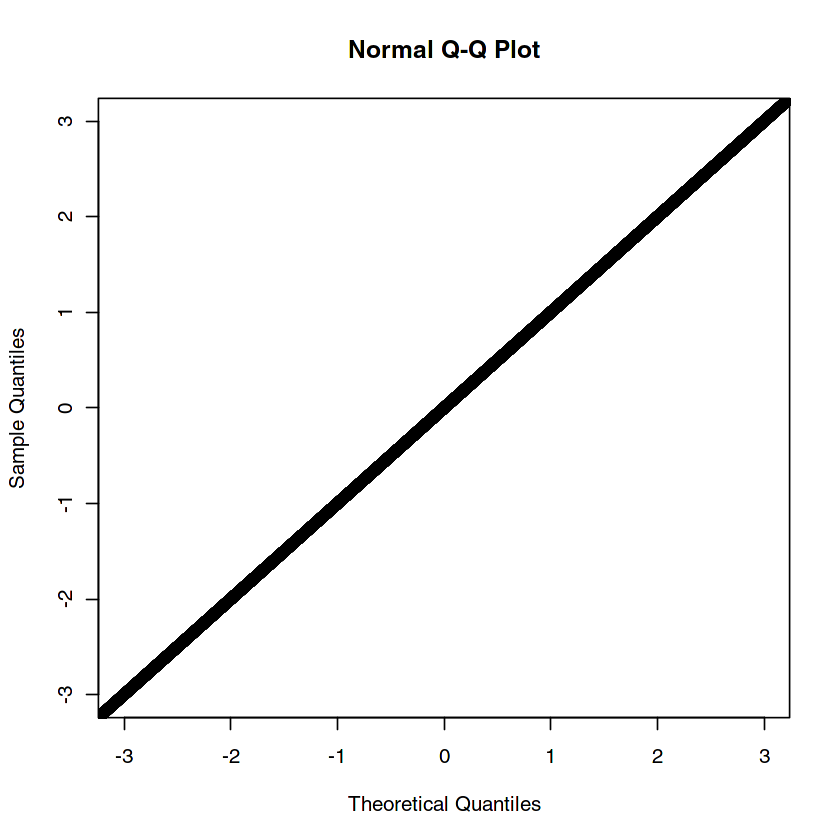

In [19]:
subset(normalize_track(H3K27_Kc167), seqnames %in% c("2L", "2R", "3L", "3R", "4"))$score %>%
  subset(between(., -7.5, 7.5) & !between(., -1e-4, 1e-4)) %>%
  qqnorm(xlim=c(-3,3), ylim=c(-3,3))

Compare the un-normalized vs normalized Germline/Kc, and then to normalized Somatic/S2. In normalized, the distribution is zero-centered, and Kc167 is spread in the positive direction a bit less skewed.

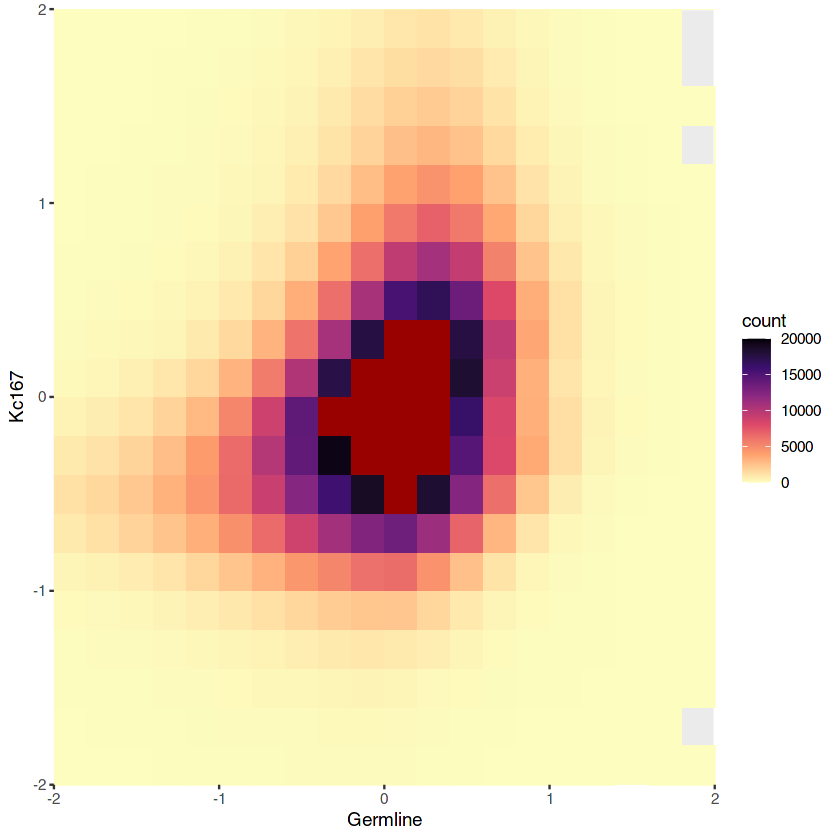

In [20]:
ggplot(
  tibble(
    Germline = (
      GRanges(
        chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr,
        score = chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr$L2FC
      )
    )$score,
    Kc167 = (H3K27_Kc167)$score,
  ) %>%
    subset(
      between(pull(., 1), -3, 3) &
        !between(pull(., 1), -1e-4, 1e-4) &
        between(pull(., 2), -3, 3) &
        !between(pull(., 2), -1e-4, 1e-4)
    ),
  aes(Germline, Kc167)
) +
  geom_bin2d(binwidth = 0.2) +
  coord_cartesian(c(-2, 2), c(-2, 2), ex=F) +
  scale_fill_viridis_c(option = "magma", direction = -1, limits = c(0, 20000), na.value = "#990000")

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


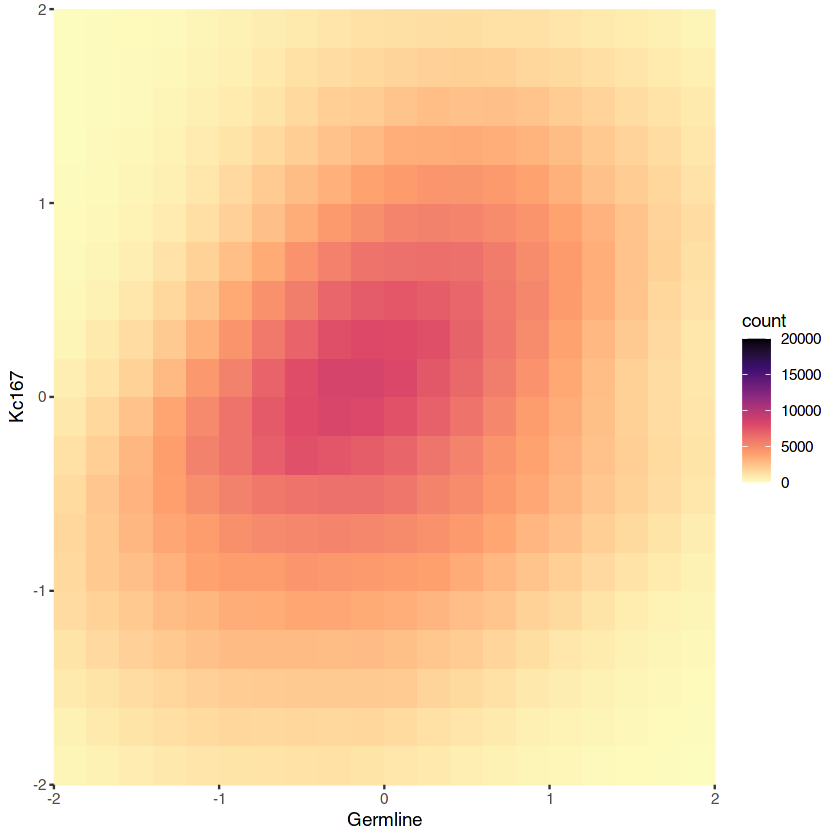

In [21]:
ggplot(
  tibble(
    Germline = normalize_track(
      GRanges(
        chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr,
        score = chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr$L2FC
      )
    )$score,
    Kc167 = normalize_track(H3K27_Kc167)$score,
  ) %>%
    subset(
      between(pull(., 1), -7.5, 7.5) &
        !between(pull(., 1), -1e-4, 1e-4) &
        between(pull(., 2), -7.5, 7.5) &
        !between(pull(., 2), -1e-4, 1e-4)
    ),
  aes(Germline, Kc167)
) +
  geom_bin2d(binwidth = 0.2) +
  coord_cartesian(c(-2, 2), c(-2, 2), ex=F) +
  scale_fill_viridis_c(option = "magma", direction = -1, limits = c(0, 20000))

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


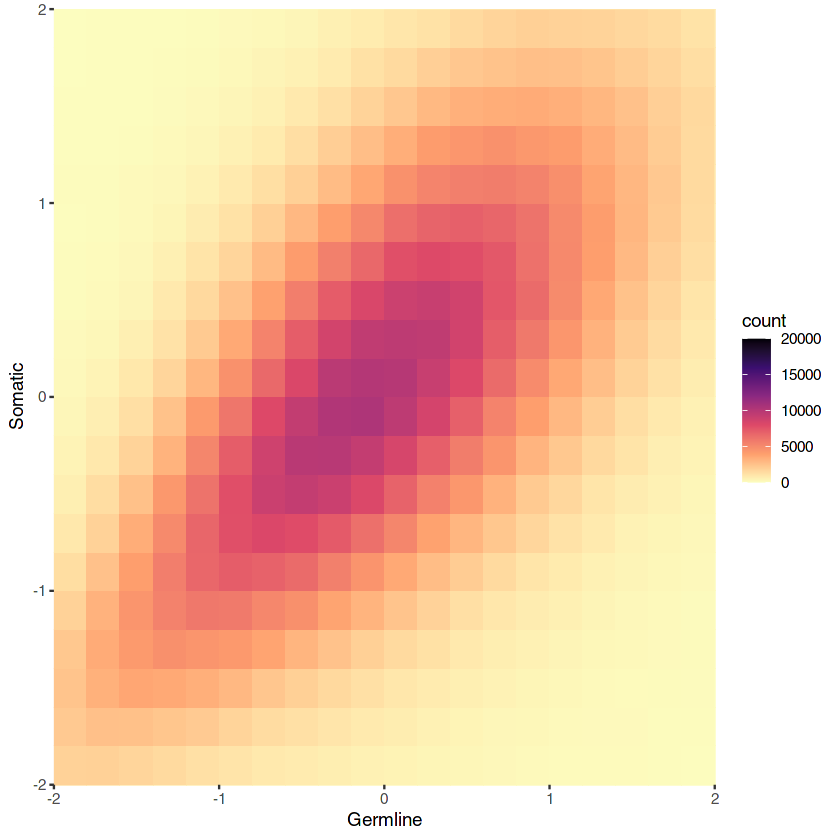

In [22]:
ggplot(
  tibble(
    Germline = normalize_track(
      GRanges(
        chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr,
        score = chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr$L2FC
      )
    )$score,
    Somatic = normalize_track(
      GRanges(
        chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr,
        score = chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr$L2FC
      )
    )$score,
  ) %>%
    subset(
      between(pull(., 1), -7.5, 7.5) &
        !between(pull(., 1), -1e-4, 1e-4) &
        between(pull(., 2), -7.5, 7.5) &
        !between(pull(., 2), -1e-4, 1e-4)
    ),
  aes(Germline, Somatic)
) +
  geom_bin2d(binwidth = 0.2) +
  coord_cartesian(c(-2, 2), c(-2, 2), ex=F) +
  scale_fill_viridis_c(option = "magma", direction = -1, limits = c(0, 20000))

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


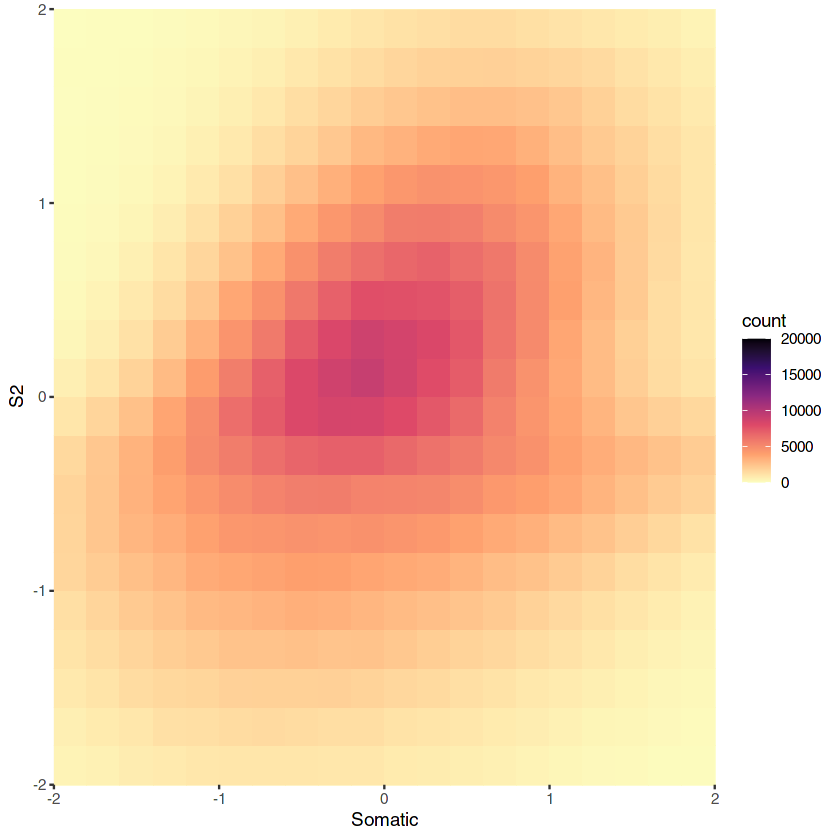

In [23]:
ggplot(
  tibble(
    Somatic = normalize_track(
      GRanges(
        chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr,
        score = chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr$L2FC
      )
    )$score,
    S2 = normalize_track(H3K27_S2)$score,
  ) %>%
    subset(
      between(pull(., 1), -7.5, 7.5) &
        !between(pull(., 1), -1e-4, 1e-4) &
        between(pull(., 2), -7.5, 7.5) &
        !between(pull(., 2), -1e-4, 1e-4)
    ),
  aes(Somatic, S2)
) +
  geom_bin2d(binwidth = 0.2) +
  coord_cartesian(c(-2, 2), c(-2, 2), ex=F) +
  scale_fill_viridis_c(option = "magma", direction = -1, limits = c(0, 20000))

In [24]:
Y <- normalize_track(
  GRanges(
    chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr,
    score = chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr$L2FC
  )
)$score
ov <- findOverlaps(chic.tile.diameter_500_chr, repli.timing_Germline_chr)
X <- tibble(
  i = to(ov),
  GSC = repli.timing_Germline_chr$score[from(ov)]
) %>%
  group_by(i) %>%
  summarise_all(mean) %>%
  with(
    sparseVector(i = i, x = GSC, length = length(chic.tile.diameter_500_chr))
  ) %>%
  as.numeric()

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [25]:
lift_repliseq <- function(repli.timing) {
  ov <- findOverlaps(chic.tile.diameter_500_chr, repli.timing)
  tibble(
    i = from(ov),
    x = repli.timing$score[to(ov)]
  ) %>%
    group_by(i) %>%
    summarise_all(mean) %>%
    with(
      sparseVector(i = i, x = x, length = length(chic.tile.diameter_500_chr))
    ) %>%
    as.numeric()
}
data <- tibble(
  GSC = cbind(
    X = lift_repliseq(repli.timing_Germline_chr),
    Y = normalize_track(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr, "L2FC")$score
  ),
  CySC = cbind(
    X = lift_repliseq(repli.timing_Somatic_chr),
    Y = normalize_track(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr, "L2FC")$score
  ),
  Kc167 = cbind(
    X = lift_repliseq(repli.timing_Kc167_chr),
    Y = normalize_track(H3K27_Kc167)$score
  ),
  S2 = cbind(
    X = lift_repliseq(repli.timing_S2_chr),
    Y = normalize_track(H3K27_S2)$score
  ),
) %>%
  print()

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


# A tibble: 1,378,116 × 4
   GSC[,"X"] [,"Y"] CySC[,"X"] [,"Y"] Kc167[,"X"] [,"Y"] S2[,"X"] [,"Y"]
       <dbl>  <dbl>      <dbl>  <dbl>       <dbl>  <dbl>    <dbl>  <dbl>
 1     0.651      0      0.707      0       0.722   1.37    0.598   2.82
 2     0.651      0      0.707      0       0.722   1.37    0.598   2.82
 3     0.651      0      0.707      0       0.722   1.37    0.598   2.81
 4     0.651      0      0.707      0       0.722   1.37    0.598   2.81
 5     0.651      0      0.707      0       0.722   1.38    0.598   2.76
 6     0.651      0      0.707      0       0.722   1.36    0.598   2.73
 7     0.651      0      0.707      0       0.722   1.36    0.598   2.72
 8     0.651      0      0.707      0       0.722   1.36    0.598   2.70
 9     0.675      0      0.738      0       0.740   1.37    0.562   2.69
10     0.675      0      0.738      0       0.740   1.34    0.562   2.70
# ℹ 1,378,106 more rows


In [26]:
cor(
  head(data$GSC[, "X"], sum(as.factor(seqnames(chic.tile.diameter_500_chr)) == "2L")),
  head(rep(repli.timing_Germline_chr$score, each=10), sum(as.factor(seqnames(chic.tile.diameter_500_chr)) == "2L"))
)

[1] 0.9957764

In [27]:
cor(
  data$GSC[, "X"][as.factor(seqnames(chic.tile.diameter_500_chr)) == "X"],
  rep(repli.timing_Germline_chr$score, each=10)[as.factor(seqnames(chic.tile.diameter_500_chr)) == "X"]
)

[1] 0.8382919

In [28]:
10e-6

[1] 1e-05

In [29]:
source("R/repli-logistic.R")
# Plot parameters after LOESS fit
x <- seq(-0.998, 0.998, by=0.002)
cuts <- seq(-0.999, 0.999, by=0.002)
# Aggregation parameters. LOESS is inefficient for large n, so we are taking the
# arithmetic mean, at an extremely fine step size (still many individuals with
# infinitesimally different timing values to regress afterwards).
xfine <- seq(-1 + 8e-5, 1 - 8e-5, by=8e-5)
cutsfine <- seq(-1 + 4e-5, 1 - 4e-5, by=8e-5)
results <- data %>%
  reframe(
    x,
    across(
      !x,
      list(
        prop = \(arr) arr %>%
          cut(cuts) %>%
          table() %>%
          prop.table(),
        CDF = \(arr) arr %>%
          cut(cuts) %>%
          table() %>%
          cumsum() %>%
          `/`(tail(., 1)),
        \(arr) predict(
          loess(
            Y ~ qlogistanh(X),
            as.data.frame(arr) %>%
              mutate(X = xfine[cut(X, cutsfine)]) %>%
              group_by(X) %>%
              summarise(Y = mean(Y)),
            span = 0.08
          ),
          qlogistanh(x),
          se=TRUE
        ) %$%
          tibble(predict = fit, predict_se = se.fit)
      )
    )
  ) %>%
  reframe(
    x,
    GSC_prop,
    GSC_CDF,
    GSC_predict = GSC_3$predict,
    GSC_predict_se = GSC_3$predict_se,
    CySC_prop,
    CySC_CDF,
    CySC_predict = CySC_3$predict,
    CySC_predict_se = CySC_3$predict_se,
    Kc167_prop,
    Kc167_CDF,
    Kc167_predict = Kc167_3$predict,
    Kc167_predict_se = Kc167_3$predict_se,
    S2_prop,
    S2_CDF,
    S2_predict = S2_3$predict,
    S2_predict_se = S2_3$predict_se,
  ) %>%
  print(width=300)
saveRDS(results, str_glue("illustrations/Repli-CHIC-Integrated-Line-Plot-{Mark_Name}.rds"))

# A tibble: 999 × 17
        x GSC_prop      GSC_CDF GSC_predict GSC_predict_se CySC_prop    CySC_CDF
    <dbl> <table[1d]>     <dbl>       <dbl>          <dbl> <table[1d]>     <dbl>
 1 -0.998 0.0002845554 0.000285          NA             NA 0.0002642723 0.000264
 2 -0.996 0.0002755559 0.000560          NA             NA 0.0002535120 0.000518
 3 -0.994 0.0002794128 0.000840          NA             NA 0.0002548033 0.000773
 4 -0.992 0.0002729846 0.00111           NA             NA 0.0002595378 0.00103 
 5 -0.99  0.0002708419 0.00138           NA             NA 0.0002647027 0.00130 
 6 -0.988 0.0002695562 0.00165           NA             NA 0.0002612594 0.00156 
 7 -0.986 0.0002854125 0.00194           NA             NA 0.0002603986 0.00182 
 8 -0.984 0.0002725560 0.00221           NA             NA 0.0002608290 0.00208 
 9 -0.982 0.0002828412 0.00249           NA             NA 0.0002595378 0.00234 
10 -0.98  0.0002686991 0.00276           NA             NA 0.0002642723 0.00260 
   CySC

In [30]:
summary(results$GSC_predict_se)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.01247 0.01266 0.01302 0.01478 0.01337 0.12841      43 

In [31]:
source("_targets.R")

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal





Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths


The following object is masked from ‘package:S4Vectors’:

    expand


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


The following object is masked from ‘package:magrittr’:

    extract



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Warning message:
“Removed 36 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 83 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 24 rows containing missing values (`geom_line()`).”


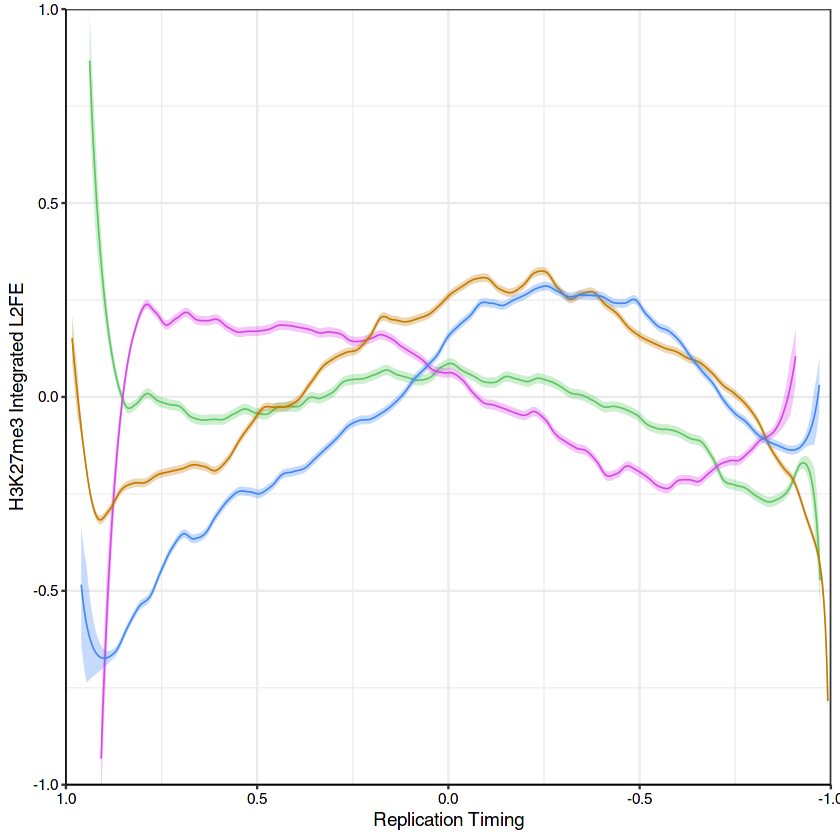

In [32]:
library(tidyr)
library(zoo)
remove_outliers <- 1e-3
rollse <- 15
alphase <- 0.3
line_cmap <- c(chic_line_track_colors$germline, chic_line_track_colors$somatic, hcl(50, 102, 57), hcl(255, 102, 57))
linewidth <- 25.4 / 72
ggplot(results) +
  geom_ribbon(aes(x, ymin = GSC_predict - rollapply(replace_na(GSC_predict_se, 0), rollse, max, partial=T), ymax = GSC_predict + rollapply(replace_na(GSC_predict_se, 0), rollse, max, partial=T)), subset(results, between(GSC_CDF, remove_outliers, 1-remove_outliers)), fill=line_cmap[1], alpha = alphase) +
  geom_line(aes(x, GSC_predict), subset(results, between(GSC_CDF, remove_outliers, 1-remove_outliers)), linewidth=linewidth, color=line_cmap[1]) +
  geom_ribbon(aes(x, ymin = CySC_predict - rollapply(replace_na(CySC_predict_se, 0), rollse, max, partial=T), ymax = CySC_predict + rollapply(replace_na(CySC_predict_se, 0), rollse, max, partial=T)), subset(results, between(CySC_CDF, remove_outliers, 1-remove_outliers)), fill=line_cmap[2], alpha = alphase) +
  geom_line(aes(x, CySC_predict), subset(results, between(CySC_CDF, remove_outliers, 1-remove_outliers)), linewidth=linewidth, color=line_cmap[2]) +
  geom_ribbon(aes(x, ymin = Kc167_predict - rollapply(replace_na(Kc167_predict_se, 0), rollse, max, partial=T), ymax = Kc167_predict + rollapply(replace_na(Kc167_predict_se, 0), rollse, max, partial=T)), subset(results, between(Kc167_CDF, remove_outliers, 1-remove_outliers)), fill=line_cmap[3], alpha = alphase) +
  geom_line(aes(x, Kc167_predict), subset(results, between(Kc167_CDF, remove_outliers, 1-remove_outliers)), linewidth=linewidth, color=line_cmap[3]) +
  geom_ribbon(aes(x, ymin = S2_predict - rollapply(replace_na(S2_predict_se, 0), rollse, max, partial=T), ymax = S2_predict + rollapply(replace_na(S2_predict_se, 0), rollse, max, partial=T)), subset(results, between(S2_CDF, remove_outliers, 1-remove_outliers)), fill=line_cmap[4], alpha = alphase) +
  geom_line(aes(x, S2_predict), subset(results, between(S2_CDF, remove_outliers, 1-remove_outliers)), linewidth=linewidth, color=line_cmap[4]) +
  coord_cartesian(
    c(1, -1),
    c(-1, 1),
    expand=FALSE
  ) +
  labs(
    x = "Replication Timing",
    y = paste0(Mark_Name, "me3 Integrated L2FE"),
  ) +
  theme(
    axis.line = element_line(linewidth = linewidth),
    panel.border = element_rect(linewidth = linewidth),
  )

In [33]:
library(egg)
library(stringr)
ggsave(
  str_glue("figure/Both-Cell-Types/Repli-CHIC-{Mark_Name}.pdf"),
  set_panel_size(last_plot(), w=unit(2.25, "in"), h=unit(2.25*3/4, "in")),
  w=3.25,
  h=3.25
)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:BiocGenerics’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“Removed 36 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 83 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 24 rows containing missing values (`geom_line()`).”
